In [1]:
%pip install -U huggingface_hub transformers

Note: you may need to restart the kernel to use updated packages.


In [3]:
from huggingface_hub import interpreter_login, whoami, get_token

interpreter_login()


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|



In [4]:
whoami()

{'type': 'user',
 'id': '67e7a94ec06ef4cda35d7463',
 'name': 'N1A1voIt',
 'fullname': 'RANDRIANARISOA Ny Avohasina Mampandry',
 'isPro': False,
 'avatarUrl': '/avatars/5d19f11ca129b5416fce08b6ca5bf14a.svg',
 'orgs': [],
 'auth': {'type': 'access_token',
  'accessToken': {'displayName': 'hiu_selection',
   'role': 'fineGrained',
   'createdAt': '2025-03-30T08:34:58.075Z',
   'fineGrained': {'canReadGatedRepos': False,
    'global': [],
    'scoped': [{'entity': {'_id': '67e7a94ec06ef4cda35d7463',
       'type': 'user',
       'name': 'N1A1voIt'},
      'permissions': []}]}}}}

In [6]:
import requests

API_URL = "https://api-inference.huggingface.co/models/codellama/CodeLlama-7b-hf"
HEADERS = {"Authorization": f"Bearer {get_token()}"}


def query(payload):
    response = requests.post(API_URL, headers=HEADERS, json=payload)
    return response.json()


print(
    query(
        payload={
            "inputs": "A HTTP POST request is used to ",
            "parameters": {"temperature": 0.8, "max_new_tokens": 50, "seed": 42},
        }
    )
)

[{'generated_text': 'A HTTP POST request is used to  send data to a web server.\n\n# Example\n```javascript\npost("localhost:3000", {foo: "bar"})\n  .then(console.log => console.log(\'success\'))\n```\n\n'}]


In [7]:
from huggingface_hub import InferenceClient

client = InferenceClient()
response = client.text_generation(
    prompt="A HTTP POST request is used to ",
    model="codellama/CodeLlama-7b-hf",
    temperature=0.8,
    max_new_tokens=50,
    seed=42,
    return_full_text=True,
)
print(response)

A HTTP POST request is used to  send data to a web server.

# Example
```javascript
post("localhost:3000", {foo: "bar"})
  .then(console.log => console.log('success'))
```




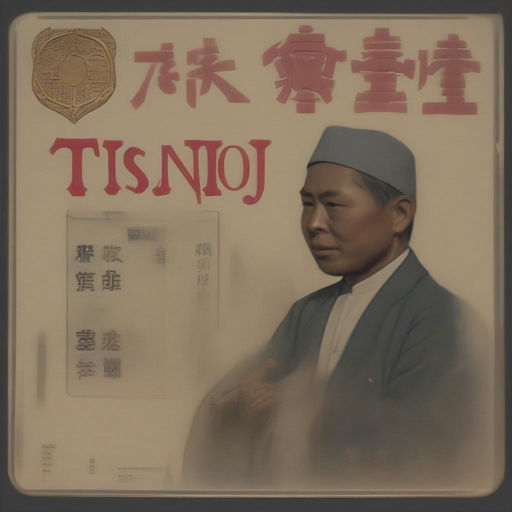

PROMPT:  A dog saying hello


In [88]:
image = client.text_to_image(
    prompt="Tsinjo",
    model="stabilityai/stable-diffusion-xl-base-1.0",
    guidance_scale=8,
    seed=42,
)

display(image.resize((image.width // 2, image.height // 2)))
print("PROMPT: ", "A dog saying hello")

In [89]:
import base64
from io import BytesIO

def pil_image_to_base64(image):
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


image_b64 = pil_image_to_base64(image)

'User:Is this image talking about an animal?<end_of_utterance>\nAssistant:'
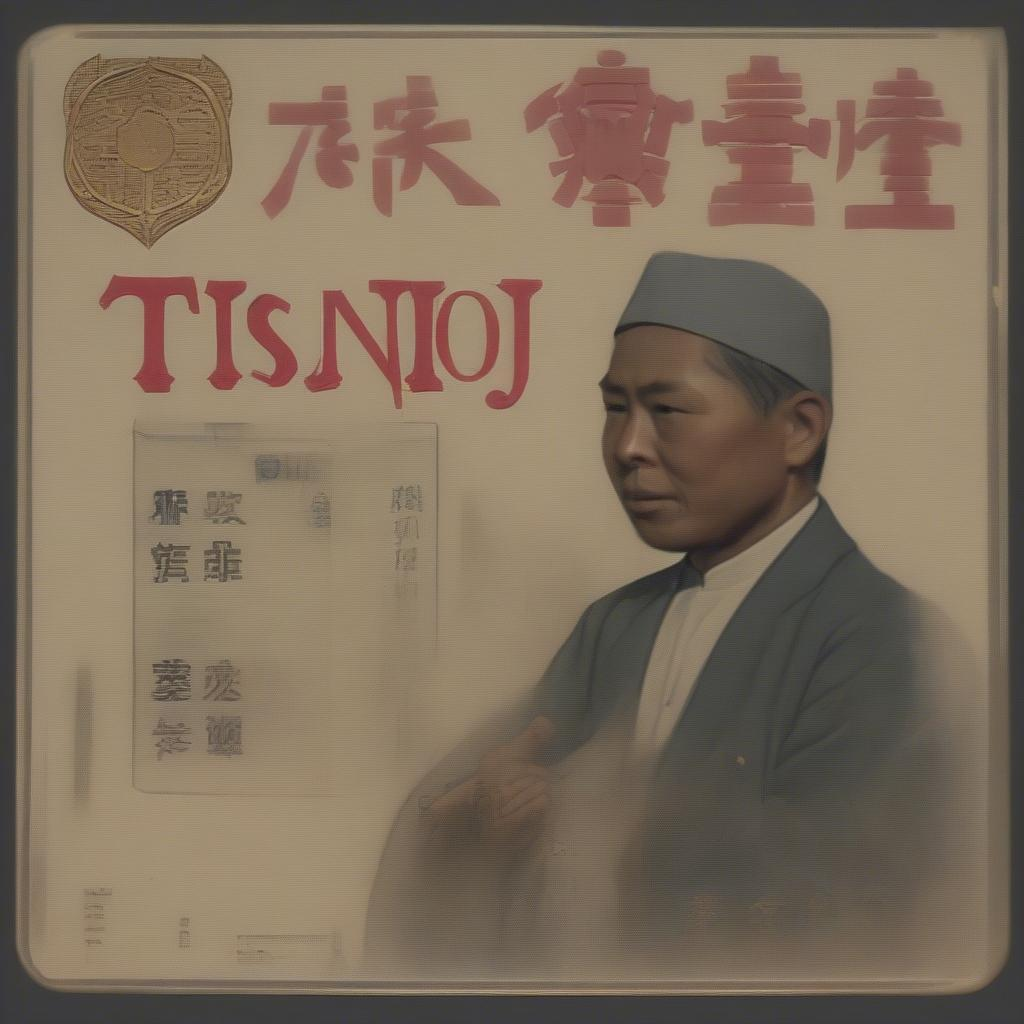

In [90]:
from transformers import AutoProcessor

# load the processor
vlm_model_id = "HuggingFaceM4/idefics2-8b-chatty"
processor = AutoProcessor.from_pretrained(vlm_model_id)

# define the user messages
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": "Is this image talking about an animal?"},
        ],
    },
]

prompt = processor.apply_chat_template(messages, add_generation_prompt=True)

image_input = f"data:image/jpeg;base64,{image_b64}"
image_input = f"![]({image_input})"
prompt = prompt.replace("<image>", image_input)
prompt

In [91]:
limerick = client.text_generation(
    prompt, model=vlm_model_id, max_new_tokens=200, seed=42
)
print(limerick)

 No, the image is not talking about an animal. It is a picture of a man, possibly a Chinese man, standing in front of a sign.


In [92]:
tts_model_id = "facebook/mms-tts-eng"
speech_out = client.text_to_speech(text=limerick, model=tts_model_id)

HfHubHTTPError: 503 Server Error: Service Temporarily Unavailable for url: https://router.huggingface.co/hf-inference/models/facebook/mms-tts-eng

In [83]:
from IPython.display import Audio

display(Audio(speech_out, rate=24000))
print(limerick)

 In a city of neon lights, so bright and so tall,
Where the rain falls like tears, and the fog is a wall.
With signs that glow in the night,
And towers that reach up so high,
This is the world of tomorrow, where dreams come to call.


In [ ]:
import requests
import base64
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

# Your Hugging Face API token
API_TOKEN = "YOUR_HUGGINGFACE_API_TOKEN"

# The model endpoint (CLIPSeg model in this example)
API_URL = "https://api-inference.huggingface.co/models/CIDAS/clipseg-rd64-refined"

headers = {"Authorization": f"Bearer {API_TOKEN}"}

def image_to_base64(image: Image.Image) -> str:
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

def query(payload: dict):
    response = requests.post(API_URL, headers=headers, json=payload)
    # Check for errors
    if response.status_code != 200:
        raise RuntimeError(f"Request failed with status code {response.status_code}: {response.text}")
    return response.json()

# Load your image
image_url = "https://raw.githubusercontent.com/huggingface/notebooks/main/assets/dog.jpg"
image = Image.open(requests.get(image_url, stream=True).raw).convert("RGB")
image_b64 = image_to_base64(image)

# Build payload: pass the image and the text prompt
payload = {
    "inputs": image_b64,
    "parameters": {"prompt": "dog"}
}

# Query the model
result = query(payload)
print(result)

# Process the result assuming it returns a mask in a suitable format.
# For demonstration, let's assume the result contains a "mask" key with a 2D array.
# You may need to adjust this based on the actual response structure.
mask_array = np.array(result.get("mask", []))  # Adjust key based on response

# If you have a mask, visualize it alongside the original image.
if mask_array.size:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask_array, cmap="gray")
    plt.title("Predicted Mask")
    plt.axis("off")

    plt.show()
else:
    print("No mask returned. Check the API response structure.")
